In [ ]:
"""
Description:
This script implements a Genetic Algorithm to solve a resource allocation problem in distributed systems.
The goal is to minimize the makespan (maximum load on any node) and balance the distribution of tasks
across nodes with varying capacities.

Main components:
- `initialize_population`: Generates a random population of candidate solutions.
- `fitness`: Evaluates how good a solution is by calculating the negative makespan.
- `selection`: Selects individuals for crossover using tournament selection.
- `crossover`: Creates new offspring using uniform crossover.
- `mutate`: Introduces randomness to avoid local optima.
- `evolve_population`: Evolves the population through selection, crossover, and mutation.
- `plot_fitness_curve`: Plots the evolution of the best fitness across generations.

Run this script to simulate the GA and view the fitness plot.
"""


In [ ]:
# Genetic Algorithm for Task Scheduling in Distributed Systems
import random
import matplotlib.pyplot as plt

In [ ]:
# Node capacities (CPU cores, Memory GB, Bandwidth Mbps)
nodes = [
    {"cpu": 8, "mem": 16, "bw": 100},
    {"cpu": 4, "mem": 32, "bw": 50},
    {"cpu": 16, "mem": 8, "bw": 200},
    {"cpu": 12, "mem": 24, "bw": 150},
    {"cpu": 6, "mem": 12, "bw": 80},
]

In [ ]:
# Task requirements and execution times per node
tasks = [
    {"cpu": 2, "mem": 4, "bw": 30, "exec_times": [10, 15, 8, 12, 14]},
    {"cpu": 4, "mem": 8, "bw": 20, "exec_times": [12, 20, 9, 10, 13]},
    {"cpu": 1, "mem": 2, "bw": 10, "exec_times": [8, 10, 7, 9, 11]},
    {"cpu": 3, "mem": 6, "bw": 25, "exec_times": [14, 18, 10, 13, 15]},
    {"cpu": 2, "mem": 4, "bw": 15, "exec_times": [9, 13, 6, 8, 10]},
    {"cpu": 5, "mem": 10, "bw": 40, "exec_times": [20, 25, 14, 18, 22]},
    {"cpu": 2, "mem": 4, "bw": 30, "exec_times": [10, 14, 9, 12, 13]},
    {"cpu": 1, "mem": 3, "bw": 20, "exec_times": [7, 11, 5, 6, 9]},
    {"cpu": 3, "mem": 5, "bw": 35, "exec_times": [15, 19, 12, 14, 17]},
    {"cpu": 4, "mem": 6, "bw": 50, "exec_times": [18, 22, 16, 20, 23]},
]

In [ ]:
# GA parameters
POP_SIZE = 30
NUM_GENERATIONS = 50
MUTATION_RATE = 0.1

In [ ]:
# Generate a random individual (a schedule)
def generate_individual():
    return [random.randint(0, len(nodes) - 1) for _ in range(len(tasks))]

In [ ]:
# Calculate fitness of an individual
def calculate_fitness(individual):
    usage = {i: {"cpu": 0, "mem": 0, "bw": 0, "time": 0} for i in range(len(nodes))}
    penalty = 0

    for i, node_id in enumerate(individual):
        task = tasks[i]
        node = nodes[node_id]
        used = usage[node_id]

        if (used["cpu"] + task["cpu"] > node["cpu"] * 0.8 or
            used["mem"] + task["mem"] > node["mem"] * 0.9 or
            used["bw"] + task["bw"] > node["bw"] * 0.75):
            penalty += 1000
        else:
            used["cpu"] += task["cpu"]
            used["mem"] += task["mem"]
            used["bw"] += task["bw"]
            used["time"] += task["exec_times"][node_id]

    makespan = max([v["time"] for v in usage.values()])
    return -makespan - penalty

In [ ]:
# Selection (tournament)
def select(population, fitnesses):
    best = None
    for _ in range(3):
        i = random.randint(0, len(population) - 1)
        if best is None or fitnesses[i] > fitnesses[best]:
            best = i
    return population[best]

# Crossover
def crossover(p1, p2):
    point = random.randint(1, len(p1) - 2)
    return p1[:point] + p2[point:]

# Mutation
def mutate(individual):
    for i in range(len(individual)):
        if random.random() < MUTATION_RATE:
            individual[i] = random.randint(0, len(nodes) - 1)

In [ ]:
# GA main loop
def genetic_algorithm():
    population = [generate_individual() for _ in range(POP_SIZE)]
    best_solution = None
    best_fitness = float('-inf')
    fitness_history = []

    for gen in range(NUM_GENERATIONS):
        fitnesses = [calculate_fitness(ind) for ind in population]
        new_population = []

        for _ in range(POP_SIZE):
            p1 = select(population, fitnesses)
            p2 = select(population, fitnesses)
            child = crossover(p1, p2)
            mutate(child)
            new_population.append(child)

        population = new_population

        gen_best = max(zip(population, fitnesses), key=lambda x: x[1])
        if gen_best[1] > best_fitness:
            best_solution, best_fitness = gen_best
        fitness_history.append(best_fitness)

        print(f"Generation {gen+1}, Best Fitness: {best_fitness}")

    return best_solution, best_fitness, fitness_history

In [ ]:
# Run the algorithm
best_solution, best_fitness, fitness_history = genetic_algorithm()


Generation 1, Best Fitness: -2027
Generation 2, Best Fitness: -2024
Generation 3, Best Fitness: -1031
Generation 4, Best Fitness: -1031
Generation 5, Best Fitness: -1031
Generation 6, Best Fitness: -1031
Generation 7, Best Fitness: -1031
Generation 8, Best Fitness: -1028
Generation 9, Best Fitness: -1028
Generation 10, Best Fitness: -1027
Generation 11, Best Fitness: -1027
Generation 12, Best Fitness: -1027
Generation 13, Best Fitness: -1027
Generation 14, Best Fitness: -1027
Generation 15, Best Fitness: -1027
Generation 16, Best Fitness: -1027
Generation 17, Best Fitness: -1027
Generation 18, Best Fitness: -1027
Generation 19, Best Fitness: -1027
Generation 20, Best Fitness: -1027
Generation 21, Best Fitness: -1027
Generation 22, Best Fitness: -1027
Generation 23, Best Fitness: -1027
Generation 24, Best Fitness: -1027
Generation 25, Best Fitness: -1027
Generation 26, Best Fitness: -1027
Generation 27, Best Fitness: -1027
Generation 28, Best Fitness: -1027
Generation 29, Best Fitness: 

In [ ]:
# Display results
print("\nBest Task-to-Node Assignment:")
for i, node in enumerate(best_solution):
    print(f"Task {i+1} -> Node {node+1}")


Best Task-to-Node Assignment:
Task 1 -> Node 5
Task 2 -> Node 1
Task 3 -> Node 3
Task 4 -> Node 2
Task 5 -> Node 1
Task 6 -> Node 4
Task 7 -> Node 1
Task 8 -> Node 3
Task 9 -> Node 1
Task 10 -> Node 4


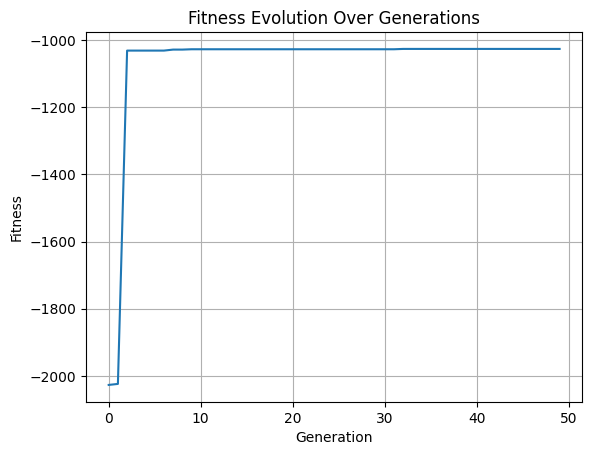

In [ ]:
# Plot fitness over generations
plt.plot(fitness_history)
plt.title("Fitness Evolution Over Generations")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.grid()
plt.show()